# Machine Learning in Python Project 2 

Due Friday, April 16th by 5 pm UK local time.

Stephen Gallagher, Ishaan S Jolly, Mariel Reyes-Salazar, Julia Stachurska

## 0. Setup

In [ ]:
# Install required packages
!pip install -q -r requirements.txt

In [ ]:
# Add any additional libraries or submodules below

# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn
import sklearn.tree
import sklearn.cluster
import sklearn.ensemble 
import sklearn.neighbors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.manifold import TSNE, Isomap, MDS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from scipy.cluster.hierarchy import dendrogram
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold

import itertools
from time import time
import joblib
import warnings
warnings.filterwarnings('ignore')

#helper function 
from helper import *

# Scipy
import scipy.cluster

In [ ]:
# Load data
d = pd.read_csv("hotel.csv")

## 1. Introduction
In this project, we help hotel operators understand patterns in their customers' bookings and the reasons why customers cancel their reservations. We referenced the dataset by Antonio, Almeida and Nunes. This data set contains information collected from two hotels located in Portugal: a resort hotel and a city hotel situated in Lisbon. We noticed that similar features were reported, such as the total number of special requests, the number of adults, children and babies. In addition to these features, because the dataset provided to us differs from Antonio et al (2019), our feature section included additional features for efficacy and to ensure better predictions are rendered. 

Before exploring the data, we first divided the data into three sets: test, train and validation. We also realised that the dataset lacked several values for children, country, agent and company. Our team assumed that those missing values are a result of human error and thus chose to impute the values for these variables based on median and mode. Following data were explored through a series of figures and the importance of each variable was noted to affirm our feature selection. 

After feature engineering, our team trained the model, multiple models, on our training set and tested it on the validation set and then on the testing set, respectively. Moreover, the Logistic Regression model is our baseline model. Our models were compared by a,b,c and which comparisons were better than others. 



In [ ]:
# Descriptive information
header = "Dataset information"
print(header)
print("="*len(header))

print("Number of rows: ", d.shape[0])
print("Number of columns: ", d.shape[1])
print("Column names:", )
for i in d.columns:
    print(i, end = ",")


Dataset information
Number of rows:  119390
Number of columns:  30
Column names:
is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,

In [ ]:
# Descriptive statistics
d.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Firstly, let us find any "NaN" values in the data and what propotion of the data it takes. 

In [ ]:
# Find NaN in the data
d_na = find_na(d)
d_na


,column_name,na_values,not_na,proportion_na,propotion_not_na
0,children,4,119386,0.000034,0.999966
1,country,488,118902,0.004087,0.995913
2,agent,16340,103050,0.136862,0.863138
3,company,112593,6797,0.943069,0.056931


There are 4 variables that contain "NaN" values. In particular, we can see that the company column contains 112,593 "NaN" values, comprising 94.31% of the variables observations, hence it doesn't provide us with any information.  
Let us investigate the balance of the classes. 

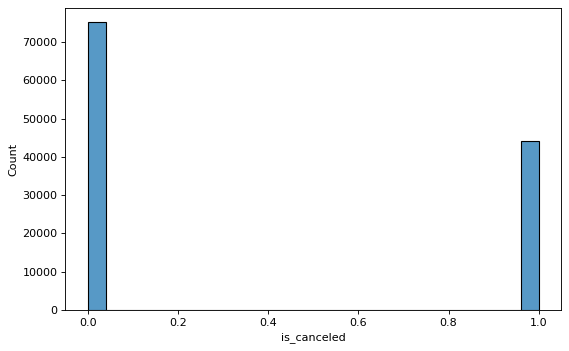

In [ ]:
# Looking at the balance of the two classes:

sns.histplot(d["is_canceled"])
plt.show()

We can see that the count of the two classes, canceled and not-canceled bookings, differ significantly. We will resample the dataset to balance the classes for two following reasons: to get a sufficient look at the underlying class (here not-canceled), and to avoid problems in making a test validation or test sample due to underrepresentation of a class. Now, we will replace all the "NaN" values with zeros. 

In the next section, we will fix this issue. 

In [ ]:
# Imputing values function
d_clean = impute_values(d)

## Resampling the dataset to balance the classes
We can see that that the classes right now are not balanced, their seems to be a lopsided issue in classes where one can see that people who have booked are over 70,000 and cancelations are over 40,000. In order to have balanced results, we chose to balance the classes first. Having imbalanced classes can lead to biased data and subsequently biased predictions. 
We decided to solve this issue by performing undersampling.

In [ ]:
noncanceled_class = d_clean[d_clean["is_canceled"] == 0]
canceled_class = d_clean[d_clean["is_canceled"]==1]

samples = canceled_class.shape[0]

# Undersample the leading class (non_canceled)

noncanceled_class_undersampled = resample(
    noncanceled_class, 
    replace= False,
    n_samples=samples, 
    random_state=123)

d_balanced = pd.concat([noncanceled_class_undersampled, canceled_class])

Now, we can see from the plot below that our data is balanced and we can start preparing the data for the exploratory data analysis.

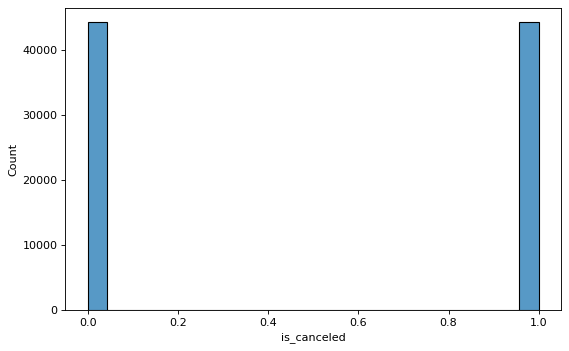

In [ ]:
sns.histplot(d_balanced["is_canceled"])
plt.show()

## Converting country names
The country names are in abbreviated format which is hard to discern. We convert the country abbreviations to actual country names for better visual aid.

In [ ]:
d_balanced = add_country_names(d_balanced)

### Binary variables

In [ ]:
var = ["babies", "children", "total_of_special_requests", 
"required_car_parking_spaces", "previous_cancellations"]
d_balanced = create_binaries(d_balanced, var)

In [ ]:
d_balanced = d_balanced.rename(
    columns={
        
        "binary_required_car_parking_spaces": "binary_car_park",
        "binary_babies": "binary_babes", 
        "binary_total_of_special_requests": "special_requests"
        }
        )

In [ ]:
d_balanced['stays_nights_total'] = d_balanced['stays_in_week_nights'] + d_balanced['stays_in_weekend_nights']
d_balanced['previous_cancellation_rate'] = d_balanced['previous_cancellations'] / (d_balanced['previous_cancellations'] + d_balanced['previous_bookings_not_canceled'])

## Splitting data

In here, we split the data in 3 sets: train, validation and test set. A "Holdout" temporary
set is created to aid in holding out 40% of the initial data, than will then be splitted
into validation and test set. Holdout is not to be used for any other purpose. 

In [ ]:
#train_set, val = train_test_split(d_balanced, test_size=0.25, random_state = 0)
#val_set, test_set = train_test_split(val, test_size=0.25, random_state = 0)

train_set, holdout = train_test_split(d_balanced, test_size=0.4, random_state=123)  # 60 - 40 split 
val_set, test_set = train_test_split(holdout, test_size=0.5, random_state=123)      #50 - 50 split

In [ ]:
print(len(train_set), 'train samples')
print(len(val_set), 'validation samples')
print(len(test_set), 'test samples')
print(f'Percentage of train samples: {round(len(train_set) / len(d_balanced)*100)}%')
print(f'Percentage of validation samples: {round(len(val_set) / len(d_balanced)*100)}%')
print(f'Percentage of test samples: {round(len(test_set) / len(d_balanced)*100)}%')

53068 train samples
17690 validation samples
17690 test samples
Percentage of train samples: 60%
Percentage of validation samples: 20%
Percentage of test samples: 20%


In [ ]:
#train_set['trip_type'] = np.where(train_set['company'].isnull(), 'Personal', 'Business')
#train_set['binary_previous_cancellation'] = np.where(train_set['previous_cancellations']>0, 1,0)
#train_set['binary_babes'] = np.where(train_set['babies'] >0, 1, 0 ) 
#train_set['binary_children'] = np.where(train_set['children']>0,1,0 )
#train_set['special_requests'] = np.where(train_set['total_of_special_requests']>0, 1, 0)
#train_set['binary_car_park'] = np.where(train_set['required_car_parking_spaces']>0,1,0)
#train_set['binary_booking_changes'] = np.where(train_set['booking_changes']>0,1,0 )


## 2. Exploratory Data Analysis and Feature Engineering

Introduction to EDA & Feature engineering

In the data set we now have 53068 data points with (?) columns. 

In [ ]:
header = "Dataset information"
print(header)
print("="*len(header))

print("Number of rows: ", train_set.shape[0])
print("Number of columns: ", train_set.shape[1])
print("Column names:", )
for i in train_set.columns:
    print(i, end = ",")

Dataset information
Number of rows:  53068
Number of columns:  38
Column names:
country,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,country_name,binary_babes,binary_children,special_requests,binary_car_park,binary_previous_cancellations,stays_nights_total,previous_cancellation_rate,

### Feature selection
In this section, we investigate the features of the data set, and make the decisions on which features to include.
This is a short summary of the features we decided not to include and why: 

1. `arrival_date_week_number`: 
2. `company`: 5.69% of the data consists of non-N/A values. Thus, we will not use this feature.
3. `arrival_date_month`: fairly uniform throughout the months. 
4. `arrival_date_year`: The ratio seems to be the same for the years. 
5. `children`: not impacting the cancelations 
6. `babies`: not impacting the cancelations significantly
7. `binary_car_park` unsure about this one
8. `deposit_type_Refundable` unsure about this one
9. `is_repeated_guest`
10. `market_segment_Complementary`
11. `market_segment_Corporate`
12. `market_segment_Undefined`
13. `required_car_parking_spaces`
Note: non zero variance features: variances across all columns given, gives which one has the least variance.

Have to give justification for 6-13 as quoting non zero variance is not enough proof. 


Let us start with finding what features have variance less than 0.05 to get a better idea which features might be less relevant in our model. If a feature exhibits a variance lower than the chosen threshold, it will be removed.

In [ ]:
# Get all string columns 
non_numerical_vars = [i for i in train_set.columns if train_set[i].dtype == "object"]

# Drop string columns, the outcome variable and "company" (too many NA)
all_feats = train_set.drop(columns = non_numerical_vars) 
all_feats = all_feats.drop(columns = ["is_canceled", "company"])

In [ ]:
# Set threshold to 0.05. 

feat_select = VarianceThreshold(threshold = 0.05)
feat_select.fit_transform(all_feats)

array([[7.400e+01, 2.016e+03, 1.800e+01, ..., 0.000e+00, 2.000e+00,
              nan],
       [1.300e+02, 2.017e+03, 1.600e+01, ..., 0.000e+00, 2.000e+00,
              nan],
       [1.100e+01, 2.016e+03, 4.700e+01, ..., 0.000e+00, 3.000e+00,
              nan],
       ...,
       [8.400e+01, 2.017e+03, 3.000e+01, ..., 0.000e+00, 8.000e+00,
              nan],
       [1.000e+00, 2.016e+03, 9.000e+00, ..., 0.000e+00, 1.000e+00,
              nan],
       [0.000e+00, 2.017e+03, 6.000e+00, ..., 0.000e+00, 1.000e+00,
              nan]])

The new "all_feats" is a dataframe after near-zero variance feature removal. It only contains the numerical variables and not string variables. Thus, although only 21 features remained, there are still 12 categorical variables.

In [ ]:
nonzerovariance_feats = all_feats[all_feats.columns[feat_select.get_support(indices=True)]]
nonzerovariance_feats.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,total_of_special_requests,binary_children,special_requests,binary_previous_cancellations,stays_nights_total,previous_cancellation_rate
46456,74,2016,18,28,0,2,2,0.0,0,0,0,7.0,0,77.62,0,0,0,0,2,NaN
76275,130,2017,16,21,0,2,2,0.0,0,0,0,286.0,0,95.00,0,0,0,0,2,NaN
430,11,2016,47,14,1,2,2,0.0,0,0,0,7.0,0,65.10,1,0,1,0,3,NaN
55720,418,2016,40,26,1,2,2,0.0,0,0,0,132.0,223,107.00,0,0,0,0,3,NaN
24537,158,2017,15,13,1,3,2,0.0,0,0,0,7.0,0,95.29,3,0,1,0,4,NaN


Below we see what numerical features were removed. 

In [ ]:
# Find the removed variables after VarianceThreshold()

removed_vars = set([i for i in all_feats.columns]) ^ set([i for i in nonzerovariance_feats.columns])
removed_vars

{'babies',
 'binary_babes',
 'binary_car_park',
 'is_repeated_guest',
 'required_car_parking_spaces'}

Since the predictors should have some variation in value, we wish to include those features that satisfy this criterion. The list above shows the features that have less than 0.05 variance. This gives us a ground to investigate those features to find further evidence for their removal. 

In [ ]:
# Company wide cancelation rate:
cx_rate = train_set['is_canceled'].sum()/d.shape[0] 

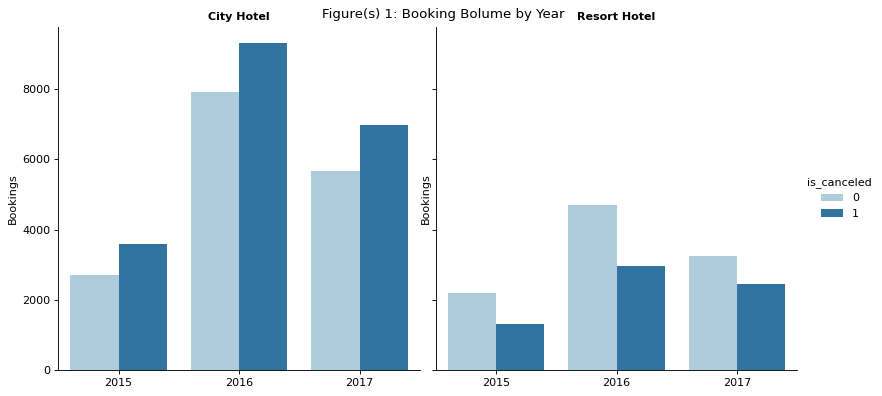

In [ ]:
can_ax = sns.catplot(
        x ='arrival_date_year', 
        col = 'hotel', 
        hue = 'is_canceled', 
        kind = 'count', 
        palette = sns.color_palette("Paired",2),
        data = train_set.sort_values('hotel', ascending= True)
        )
can_ax.set_titles(
        col_template = "{col_name}", 
        fontweight ='bold'
        )
can_ax.set(
        ylabel = 'Bookings', 
        xlabel = '')
can_ax.fig.suptitle(
        'Figure(s) 1: Booking Bolume by Year'
        )
plt.show()

We can see that the City Hotel is more popular, but the number of cancelations are greater than the number of occured bookings. 
The Resort Hotel has less cancelations than the bookings that occured. 
In both cases, we see the increase in booking volume, however the ratio of the cancelations to the bookings occured throughout the years seem the same. We note that the ratio of cancelation to bookings for City hotel is the same for Resort Hotel as well. Thus, we can exclude arrival_date_year as a feature because it would not provide much variability to our results. 


In [ ]:
# Reordering of the month
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

def cancel_rate(x, feature, dataset, category_sort):
    cancelation_rate = dataset[['is_canceled',feature, x]].groupby(
        [feature, x, 'is_canceled']).size().reset_index(name ='count')
    cancelation_rate = cancelation_rate.pivot_table(
        index = [feature, x], 
        columns ='is_canceled', 
        values = 'count').reset_index().rename(columns = {0:'not_canceled' ,1: 'canceled'})
    cancelation_rate['cancelation_rate'] = cancelation_rate.canceled/ (cancelation_rate.canceled + cancelation_rate.not_canceled)
    cancelation_rate[x] = pd.Categorical(cancelation_rate[x], categories = category_sort, ordered =True)
    
    
    return cancelation_rate

h_cr = cancel_rate('arrival_date_month','hotel',train_set,months)


In [ ]:
# # Cancelation rate by hotel and month

# cancelation_rate = train_set[['is_canceled', 'hotel_Resort Hotel','arrival_date_month']].groupby(
#     ['hotel_Resort Hotel', 'arrival_date_month', 'is_canceled']).size().reset_index(name ='count')

# cancelation_rate = cancelation_rate.pivot_table(
#         index = ['hotel_Resort Hotel', 'arrival_date_month'], 
#         columns ='is_canceled', 
#         values = 'count').reset_index().rename(columns = {0:'not_canceled' ,1: 'canceled'})

# cancelation_rate['cancelation_rate'] = cancelation_rate.canceled/ (cancelation_rate.canceled + cancelation_rate.booked)

# # Reordering of the month

# months = ["January", "February", "March", "April", "May", "June", 
#           "July", "August", "September", "October", "November", "December"]

# # Idea inspired by: https://stackoverflow.com/questions/48042915/sort-a-pandass-dataframe-series-by-month-name

# cancelation_rate['arrival_date_month'] = pd.Categorical(cancelation_rate['arrival_date_month'], categories = months, ordered =True)


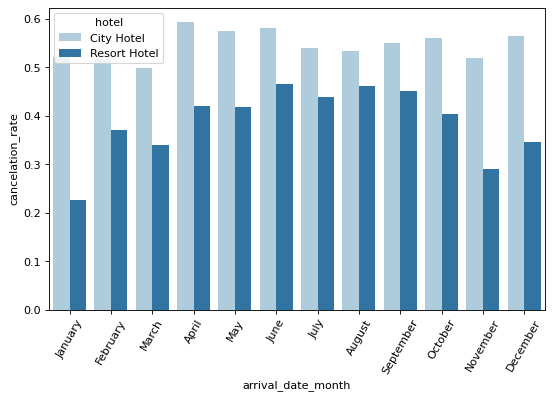

In [ ]:
can_rate_ax = sns.barplot(
    x = 'arrival_date_month', 
    hue ='hotel',
    y ='cancelation_rate',
    palette = sns.color_palette("Paired",2),
    data = h_cr
)

plt.xticks(rotation = 60)
plt.show()

We can see that the cancelation rate per month for City hotel appears to be approximately uniform throughout the year. We can see a slight variation in the cancellation rate for the Resort Hotel, with a significant drop in cancellation rate for the month of January. The difference in cancellation rates for both hotels between different months of the year does not appear to be a significant predictor of the cancellation rate. Thus, we will not include this feature in the model.

Now, let us see the cancelations from  perspective of the country of origin of the clients. 


In [ ]:
# A dataframe of the countries and number of bookings
country_df = train_set[['is_canceled', 'country_name']].groupby( 
    ['is_canceled', 'country_name']).size().reset_index(name ='count')

# Counting how many were canceled and not canceled
country_df = country_df.pivot_table(
    index = ['country_name'], columns = 'is_canceled', values = 'count').reset_index().rename(
        columns = {0:'not_canceled', 1:'canceled'}).fillna(0)

# Finding the cancelation rate per country
country_df['cancelation_rate'] = country_df.canceled/(country_df.canceled + country_df.not_canceled)

# Influx and outflux - Volume ? 
country_df['flux'] = country_df['not_canceled'] + country_df['canceled']

#d.shape[0] : https://stackoverflow.com/questions/10200268/what-does-shape-do-in-for-i-in-rangey-shape0/21200291

#Share of flux in the data set
country_df['share'] = country_df['flux']/d.shape[0]
country_df

#Top 10 countries by flux canceled and non_canceled bookings: 
country_top  = country_df.sort_values('flux', ascending = False).head(10).country_name.unique()

# Dataframe containing Top 10 countries Volume
country_top_df = country_df[country_df['country_name'].isin(country_top)].copy().drop(
    ['flux','cancelation_rate','share'],axis=1).melt(
        id_vars = ['country_name']).rename(
            columns={'value': 'count'})

# What does it do? Idk how to comment it >.<
country_top_df['country_name'] = pd.Categorical(
    country_top_df['country_name'], categories=country_top, ordered=True)

# Sorting 
country_top_cancelation_rate = country_df.sort_values('cancelation_rate', ascending=False).head(10).country_name.unique()

In [ ]:
country_top_cancelation_rate_df = country_df[ country_df['country_name'].isin(country_top)].copy()
country_top_cancelation_rate_df['country_name'] = pd.Categorical(
    country_top_cancelation_rate_df['country_name'], categories=country_top, ordered= True
)

country_top_cancelation_rate_df.sort_values(by = 'cancelation_rate', ascending = False)


is_canceled,country_name,not_canceled,canceled,cancelation_rate,flux,share
107,Portugal,7606.0,16584.0,0.685573,24190.0,0.202613
18,Brazil,473.0,473.0,0.500000,946.0,0.007924
66,Italy,861.0,824.0,0.489021,1685.0,0.014113
123,Spain,2282.0,1331.0,0.368392,3613.0,0.030262
63,Ireland,929.0,536.0,0.365870,1465.0,0.012271
138,United States,557.0,294.0,0.345476,851.0,0.007128
137,United Kingdom,3358.0,1488.0,0.307057,4846.0,0.040590
14,Belgium,655.0,289.0,0.306144,944.0,0.007907
44,France,2981.0,1162.0,0.280473,4143.0,0.034701
48,Germany,2126.0,722.0,0.253511,2848.0,0.023855


Looking at the top ten countries that cancel, we see that there is a variance between different countries and their respective cancelation rates. From the figure above we can see that 68.56% clients from Portugal cancel in comparison to US where the cancelation rate is 34%. Moreover the top countries account for more than 80 percent of the data set. Therefore, countries are definitely an important feature. 

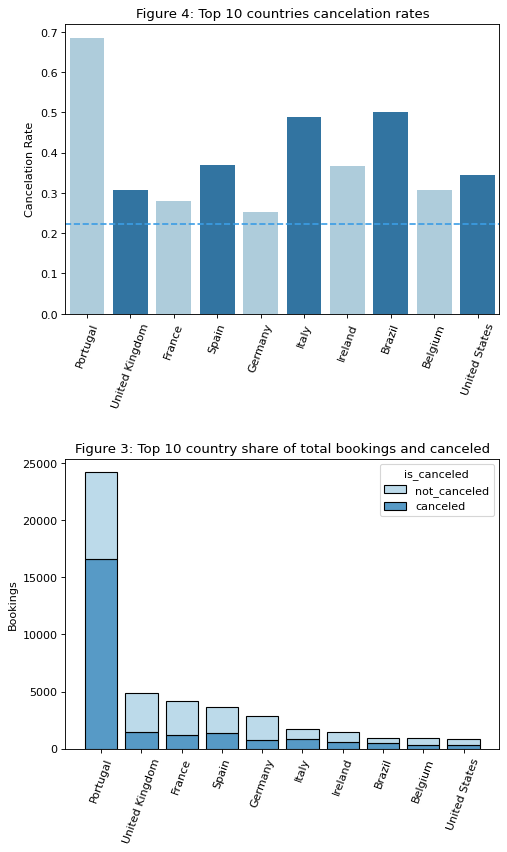

In [ ]:
# fig 3, can we remove it? - I suggest not, figure 3 shows that Portugal's cancelation rate is higher 
#than many countries' cancelation rate combined as such it would make sense should we remove 
#country as a feature and keep portugal as a feature.. 
# Fig 4 also shows that as well as the dataframe above, and I also mention this in the
# paragraph above. Don't we show the same thing? 
plt.figure(figsize = (7,12))
plt.subplot(2,1,2)
country_ax = sns.histplot(country_top_df, 
            x ='country_name',
            hue = 'is_canceled',
            weights = 'count', 
            multiple = 'stack',
            shrink = 0.8,
            palette = sns.color_palette("Paired",2)
)
plt.xticks(rotation = 70)
country_ax.set_title('Figure 3: Top 10 country share of total bookings and canceled')


country_ax.set(
    ylabel = 'Bookings', 
    xlabel = ''
)

plt.subplot(2,1,1)
country_cancel_ax = sns.barplot(
    data = country_top_cancelation_rate_df, 
    y = 'cancelation_rate',
    x = 'country_name', 
    palette = sns.color_palette("Paired",2)

)

plt.xticks(rotation = 70)
country_cancel_ax.set_title('Figure 4: Top 10 countries cancelation rates')

country_cancel_ax.set(
    ylabel = 'Cancelation Rate',
    xlabel = ''
)
country_cancel_ax.axhline(cx_rate, ls='--',color='#3b9de5',label='Average Cancellation Rate')
plt.subplots_adjust(hspace=0.5)
plt.show()


Figure 4 visualises the results mentioned. Again, we can see Portugal has the highest cancelation rates, then Brazil and Italy. Spain, Ireland and Belgium, United States and the UK have very similar cancelation rates, not exceeding 37%. Belgium, Germany and France are a group of countries with the least cancelation rates in the top 10 country cancelations. 

Now, let us investigate the cancelations considering the deposit type. 

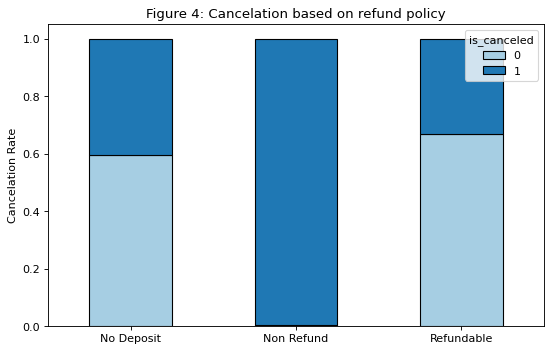

In [ ]:
deposit = train_set.groupby('deposit_type')['is_canceled'].value_counts(
    normalize = True).unstack('is_canceled').plot.bar(
    stacked=True, edgecolor = 'black', color = sns.color_palette("Paired",2))

deposit.set_title(
    'Figure 4: Cancelation based on refund policy'
    )
deposit.set(
    xlabel='', 
    ylabel='Cancelation Rate')

plt.xticks(rotation = 360)
plt.show()

The above result is surprising. Intuitively, having no deposit or refundable deposit, would encourage the cancelations, however according to the plot above, we see that non refundable trips are always canceled.

Now, let us consider other interesting features.

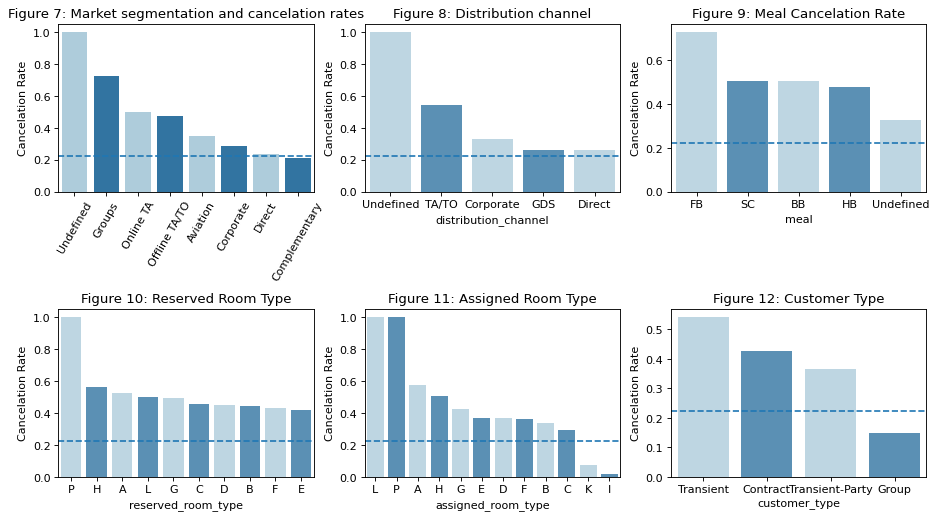

In [ ]:
plt.figure(figsize = (14,7.5))

# Market Segmentation
Market = train_set[['is_canceled', 'market_segment']].groupby( 
    ['is_canceled', 'market_segment']).size().reset_index(name = 'count')

# Note we don't have a binary variable for market_segment.. 

Market = Market.pivot_table(
        index = ['market_segment'], 
        columns = 'is_canceled', 
        values = 'count').reset_index().fillna(0).rename(columns = {0:'booked', 1: 'canceled' })
Market['cancelation_rate'] = Market.canceled/(Market.canceled + Market.booked)
plt.subplot(2,3,1)
Market_ax = sns.barplot( 
    x = 'market_segment', 
    y = 'cancelation_rate', 
    palette = sns.color_palette("Paired",2),
    data = Market.sort_values('cancelation_rate', ascending=False),
)
Market_ax.set_title('Figure 7: Market segmentation and cancelation rates' )
Market_ax.set(
    xlabel = '', 
    ylabel = 'Cancelation Rate')

Market_ax.axhline(cx_rate, ls='--',label='Average Cancellation Rate')
plt.xticks(rotation = 60)

# Distribution channel 
distribution_rate = train_set[['is_canceled', 'distribution_channel']].groupby( 
    ['is_canceled', 'distribution_channel']).size().reset_index(name = 'count')
distribution_rate = distribution_rate.pivot_table(
    index = ['distribution_channel'], 
    columns ='is_canceled', 
    values = 'count').reset_index().fillna(0).rename(
        columns ={0:'booked', 1:'canceled'}
    )
distribution_rate
distribution_rate['cancelation_rate'] = distribution_rate.canceled/ (distribution_rate.canceled + distribution_rate.booked)
plt.subplot(2,3,2)
distribution_rate_ax = sns.barplot(
    x ='distribution_channel', 
    y = 'cancelation_rate', 
    palette = sns.color_palette("Paired",2),
    data = distribution_rate.sort_values('cancelation_rate', ascending=False), 
    alpha = 0.8, 


)
distribution_rate_ax.set(ylabel = 'Cancelation Rate')

distribution_rate_ax.axhline(cx_rate, ls='--',label='Average Cancellation Rate')
distribution_rate_ax.set_title('Figure 8: Distribution channel')

meal_rate = train_set[['is_canceled', 'meal']].groupby( 
    ['is_canceled', 'meal']).size().reset_index(name = 'count')

# Meal 

meal_rate = meal_rate.pivot_table(
    index = ['meal'], 
    columns ='is_canceled', 
    values = 'count').reset_index().fillna(0).rename(
        columns ={0:'booked', 1:'canceled'}
    )

meal_rate['cancelation_rate'] = meal_rate.canceled/ (meal_rate.canceled + meal_rate.booked)
plt.subplot(2,3,3)
meal_rate_ax = sns.barplot(
    x ='meal', 
    y = 'cancelation_rate', 
    palette = sns.color_palette("Paired",2),
    data = meal_rate.sort_values('cancelation_rate', ascending=False), 
    alpha = 0.8, 


)
meal_rate_ax.set(ylabel = 'Cancelation Rate')
meal_rate_ax.axhline(cx_rate, ls='--',label='Average Cancellation Rate')
meal_rate_ax.set_title('Figure 9: Meal Cancelation Rate')

#Reservation Type

reserved_rate = train_set[['is_canceled', 'reserved_room_type']].groupby( 
    ['is_canceled', 'reserved_room_type']).size().reset_index(name = 'count')
reserved_rate  = reserved_rate.pivot_table(
    index = ['reserved_room_type'], 
    columns = 'is_canceled', 
    values ='count').reset_index().rename(columns = {0:'booked', 1: 'canceled'}).fillna(0)
reserved_rate['cancelation_rate'] = reserved_rate.canceled/(reserved_rate.canceled + reserved_rate.booked)

plt.subplot(2,3,4)
reserved_rate_ax = sns.barplot(
    x ='reserved_room_type', 
    y = 'cancelation_rate', 
    data = reserved_rate.sort_values('cancelation_rate', ascending=False), 
    palette = sns.color_palette("Paired",2),
    alpha = 0.8, 
)
reserved_rate_ax.set_title(
    'Figure 10: Reserved Room Type'
)
reserved_rate_ax.axhline(cx_rate, ls='--',label='Average Cancellation Rate')
reserved_rate_ax.set(ylabel = 'Cancelation Rate')

#Assigned room 
assigned_rate = train_set[['is_canceled', 'assigned_room_type']].groupby( 
    ['is_canceled', 'assigned_room_type']).size().reset_index(name = 'count')
assigned_rate  = assigned_rate.pivot_table(
    index = ['assigned_room_type'], 
    columns = 'is_canceled', 
    values ='count').reset_index().rename(columns = {0:'booked', 1: 'canceled'}).fillna(0)
assigned_rate['cancelation_rate'] = assigned_rate.canceled/(assigned_rate.canceled + assigned_rate.booked)
plt.subplot(2,3,5)
assinged_rate_ax = sns.barplot(
    x ='assigned_room_type', 
    y = 'cancelation_rate', 
    data = assigned_rate.sort_values('cancelation_rate', ascending=False), 
    palette = sns.color_palette("Paired",2),
    alpha = 0.8, 
)

assinged_rate_ax.set(ylabel = 'Cancelation Rate')

assinged_rate_ax.axhline(cx_rate, ls='--',label='Average Cancellation Rate')

assinged_rate_ax.set_title(
    'Figure 11: Assigned Room Type'
)

customer = train_set[['is_canceled', 'customer_type']].groupby( 
    ['is_canceled', 'customer_type']).size().reset_index(name = 'count')

customer  = customer.pivot_table(
    index = ['customer_type'], 
    columns = 'is_canceled', 
    values ='count').reset_index().rename(columns = {0:'booked', 1: 'canceled'}).fillna(0)
customer['cancelation_rate'] = customer.canceled/(customer.canceled + customer.booked)
plt.subplot(2,3,6)
customer_ax = sns.barplot(
    x ='customer_type', 
    y = 'cancelation_rate', 
    data = customer.sort_values('cancelation_rate', ascending=False), 
    palette = sns.color_palette("Paired",2),
    alpha = 0.8)

customer_ax.set(ylabel = 'Cancelation Rate')

customer_ax.axhline(cx_rate, ls='--',label='Average Cancellation Rate')


customer_ax.set_title(
    'Figure 12: Customer Type'
)


plt.subplots_adjust(hspace=0.7)

#Add legends 

plt.show()

Market segmentation: --
What are those "groups","aviation" etc? I can't find the descriptions in README.md

Distribution channel: --

Meal Cancelation Rate: Not considering the undefined meal, half board, bed and breakfast and no-meal package have the same or very close cancelation rate. We can see that the clients cancel full board most often. (decision: will we include this?)

Reserved Room type: We can see that the cancelation rates for the reserved room types are fairly uniform. However room type P always gets canceled. (decision: will we include this?) 

Assigned room type: I guess I have issued with coming up with something for this one, because I thought if you reserve a room of type a, you get room of type a. If that was the case those diagrams would be the same, but I think it is not. So not, sure how to go around it. Help?

Customer: The result we can see in Figure 12 is quite interesting. We can see that the groups cancel least often. The variability of the results is signiciant, therefore it is a good idea to include the customer type as a feature in the model. (decision: are we?)

Now, let us consider the parking. 

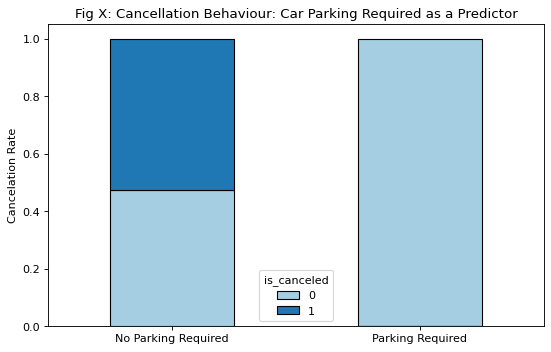

In [ ]:
parking = train_set.groupby('binary_car_park')['is_canceled'].value_counts(normalize=True).unstack('is_canceled').plot.bar(
    stacked=True, 
    edgecolor = 'black',color = sns.color_palette("Paired",2))
parking.set_title(
    'Fig X: Cancellation Behaviour: Car Parking Required as a Predictor'
    )
parking.set(
    xlabel='', 
    ylabel='Cancelation Rate')

parking.set_xticklabels( ('No Parking Required', 'Parking Required') )

plt.xticks(rotation = 360)
plt.show()

Another unexpected and interesting result. When parking is required, the cancelations never occur, and with no parking, there is a 50-50 chance they will. (Decision?) 

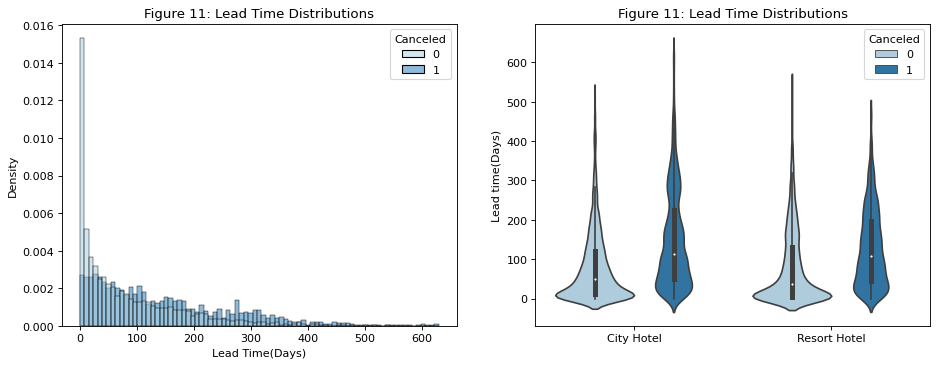

In [ ]:
plt.figure(figsize = (14,5))
plt.subplot(1, 2, 2)
Lead_time_ax = sns.violinplot(
    x='hotel', 
    y='lead_time', 
    hue='Canceled',
    palette = sns.color_palette("Paired",2),
    data=train_set.rename(columns={'is_canceled': 'Canceled'}).sort_values('hotel', ascending=True)
    )
Lead_time_ax.set(
    ylabel='Lead time (Days)', 
    xlabel='')
Lead_time_ax.set_title(
    'Figure 11: Lead Time Distributions'
    )

plt.subplot(1, 2, 1) 
Lead_time_ax = sns.histplot(
    hue='Canceled', 
    x='lead_time', 
    stat='density',
    palette = sns.color_palette("Paired",2),
    data=train_set.rename(columns={'is_canceled': 'Canceled'}).sort_values('hotel', ascending=True)
    )
Lead_time_ax.set(
    xlabel='Lead Time (Days)')
Lead_time_ax.set_title(
    'Figure 11: Lead Time Distributions'
    )
plt.show()

From the plot of the lead time distributions, we observe a heavily positive skew for non-cancelled bookings, indicating that a vast majority bookings are made on the same day of arrival. This suggests that most bookings are made within 50 days of arrival, and the frequency of higher lead times decreases as the lead times increase.

We observe a similar trend for the lead times between bookings and cancellations, however without a significantly positive skew. This suggests that as more time passes from the initial booking date, it becomes less likely that a cancellation will be made.

In [ ]:
# train_set["lead_time"]

Let us check how the ADR varies when using the market segmentation and distribution channel. 

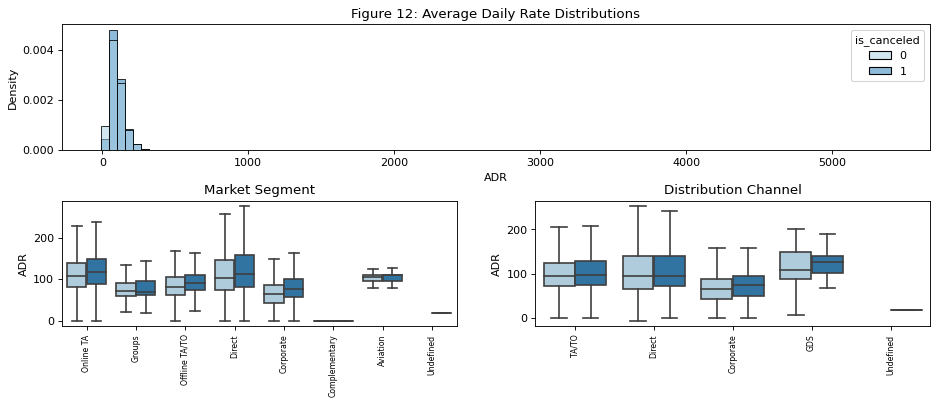

In [ ]:
plt.figure(figsize = (14,5))
plt.subplot(2,1,1) 

adr_ax = sns.histplot(
    hue='is_canceled', 
    x='adr', 
    stat='density',
    bins=100,
    data=train_set,
    palette = sns.color_palette("Paired",2),
    )
adr_ax.set(
    xlabel='ADR')
adr_ax.set_title(
    'Figure 12: Average Daily Rate Distributions'
    )

#for market segment
plt.subplot(2,2,3)

mrk_ax = sns.boxplot(
    hue = 'is_canceled', 
    x = 'market_segment', 
    y = 'adr',
    showfliers = False,
    data = train_set[train_set['adr'] < 5000],
    palette = sns.color_palette("Paired",2),
    
)

mrk_ax.set(
    ylabel='ADR', 
    xlabel='')
mrk_ax.set_title(
    'Market Segment'
    )
mrk_ax.get_legend().remove()
plt.xticks(rotation = 90,fontsize=7)

#For Distribution channel
plt.subplot(2,2,4)

dist_ax = sns.boxplot(
    hue = 'is_canceled', 
    x = 'distribution_channel', 
    y = 'adr',
    showfliers = False,
    data = train_set[train_set['adr'] < 5000],
    palette = sns.color_palette("Paired",2)
)
dist_ax.set(
    ylabel='ADR', 
    xlabel='')
dist_ax.set_title(
    'Distribution Channel'
    )

dist_ax.get_legend().remove()   
plt.xticks(rotation = 90,fontsize=7)
plt.subplots_adjust(hspace=0.4)
plt.show()


In [ ]:
#######
adr_ax = sns.histplot(
    hue='is_canceled', 
    x='adr', 
    stat='density',
    bins=100,
    data=train_set,
    palette = sns.color_palette("Paired",2),
    )
adr_ax.set(
    xlabel='ADR')
adr_ax.set_title(
    'Figure 12: Average Daily Rate Distributions'
    )

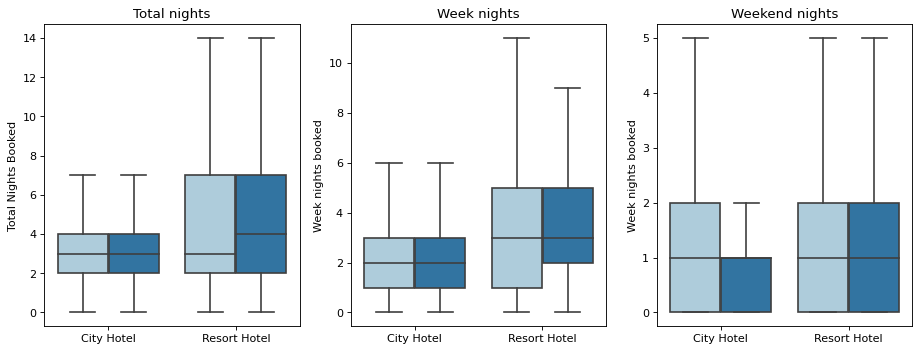

In [ ]:
plt.figure(figsize = (14,5))
plt.subplot(1,3,1)
total_stay_ax = sns.boxplot(
    x='hotel', 
    y='stays_nights_total', 
    hue='is_canceled', 
    showfliers = False,
    data=train_set.sort_values('hotel', ascending=True),
    palette = sns.color_palette("Paired",2)
    )
total_stay_ax.set(
    ylabel='Total Nights Booked', 
    xlabel='')
total_stay_ax.set_title(
    'Total Nights'
    )
total_stay_ax.get_legend().remove()
total_stay_ax.set_title(
    'Total nights' )


plt.subplot(1,3,2)
week_stay_ax = sns.boxplot(
    x='hotel', 
    y='stays_in_week_nights', 
    hue='is_canceled', 
    showfliers = False,
    data=train_set.sort_values('hotel', ascending=True),
    palette = sns.color_palette("Paired",2)
    )
week_stay_ax.set(
    ylabel='Week nights booked', 
    xlabel='')
week_stay_ax.set_title(
    'Week nights'
    )
week_stay_ax.get_legend().remove()


plt.subplot(1,3,3)
weekend_stay_ax = sns.boxplot(
    x='hotel', 
    y='stays_in_weekend_nights', 
    hue='is_canceled', 
    showfliers = False,
    data=train_set.sort_values('hotel', ascending=True),
    palette = sns.color_palette("Paired",2)
    )
weekend_stay_ax.set(
    ylabel='Week nights booked', 
    xlabel='')
weekend_stay_ax.set_title(
    'Weekend nights'
    )
weekend_stay_ax.get_legend().remove()

plt.show()

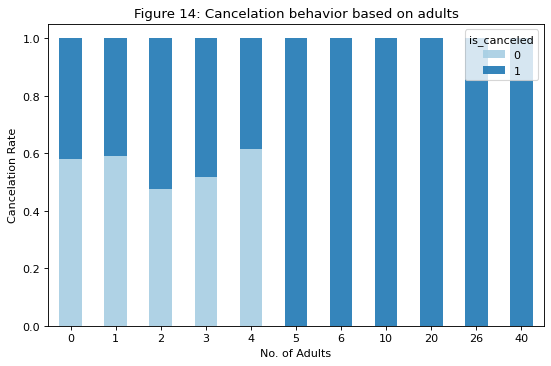

In [ ]:
adult= train_set.groupby('adults')['is_canceled'].value_counts(
    normalize = True).unstack('is_canceled').plot.bar(stacked = True, alpha = 0.9, color = sns.color_palette("Paired",2))
    #alpha indicates how opacity of the plot
adult.set_title('Figure 14: Cancelation behavior based on adults' )
adult.set(
    xlabel = 'No. of Adults', 
    ylabel = 'Cancelation Rate'
)
plt.xticks(rotation = 360)
plt.show ()

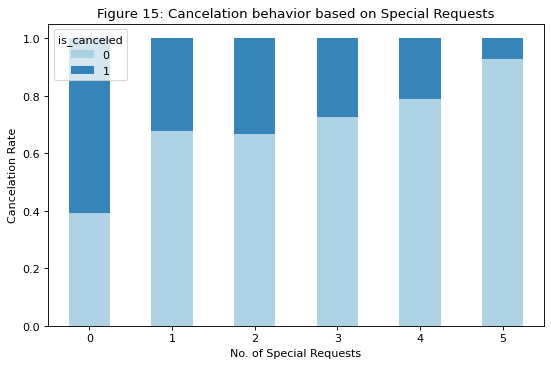

In [ ]:
special_request= train_set.groupby('total_of_special_requests')['is_canceled'].value_counts(
    normalize = True).unstack('is_canceled').plot.bar(stacked = True, alpha = 0.9, color = sns.color_palette("Paired",2))
    #alpha indicates how opacity of the plot
special_request.set_title('Figure 15: Cancelation behavior based on Special Requests' )
special_request.set(
    xlabel = 'No. of Special Requests', 
    ylabel = 'Cancelation Rate'
)
plt.xticks(rotation = 360)
plt.show()

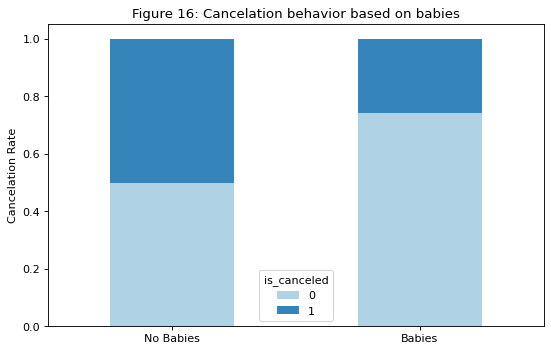

In [ ]:
babies= train_set.groupby('binary_babes')['is_canceled'].value_counts(
    normalize = True).unstack('is_canceled').plot.bar(stacked = True, alpha = 0.9, color = sns.color_palette("Paired",2))
    #alpha indicates how opacity of the plot
babies.set_title('Figure 16: Cancelation behavior based on babies' )
babies.set(
    xlabel = '', 
    ylabel = 'Cancelation Rate'
)
babies.set_xticklabels( ('No Babies', 'Babies') )
plt.xticks(rotation = 360)
plt.show()

As we can see, having babies or not having babies, does not differ significantly in the cancelations rates, thus, we will not consider this as a feature in our model.

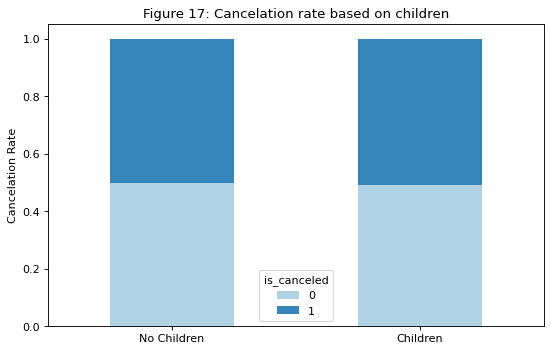

In [ ]:
children= train_set.groupby('binary_children')['is_canceled'].value_counts(
    normalize = True).unstack('is_canceled').plot.bar(stacked = True, alpha = 0.9, color = sns.color_palette("Paired",2))
    #alpha indicates how opacity of the plot
children.set_title('Figure 17: Cancelation rate based on children' )
children.set(
    xlabel = '', 
    ylabel = 'Cancelation Rate'
)
children.set_xticklabels( ('No Children', 'Children') )
plt.xticks(rotation = 360)
plt.show()

Clearly the children do not impact the cancelation at all. I recommend townsville to have as many babies as possible. It wouldn't impact your hotel stay, eva. - I am not having babies ishaan! Towsville has to wait a loooooooooooooooooooooong time.

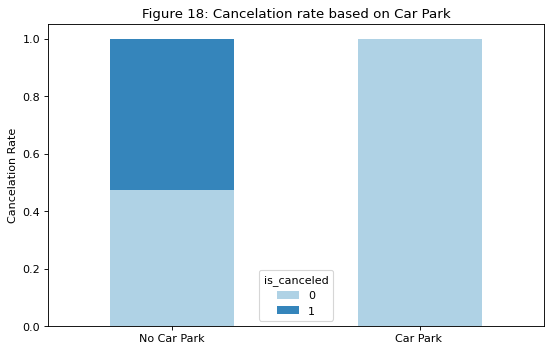

In [ ]:
car_park= train_set.groupby('binary_car_park')['is_canceled'].value_counts(
    normalize = True).unstack('is_canceled').plot.bar( stacked = True, alpha = 0.9, color = sns.color_palette("Paired",2))
    #alpha indicates capacity of the plot
car_park.set_title('Figure 18: Cancelation rate based on Car Park' )
car_park.set(
    xlabel = '', 
    ylabel = 'Cancelation Rate'
)
car_park.set_xticklabels( ('No Car Park', 'Car Park ') )
plt.xticks(rotation = 360)
plt.show()

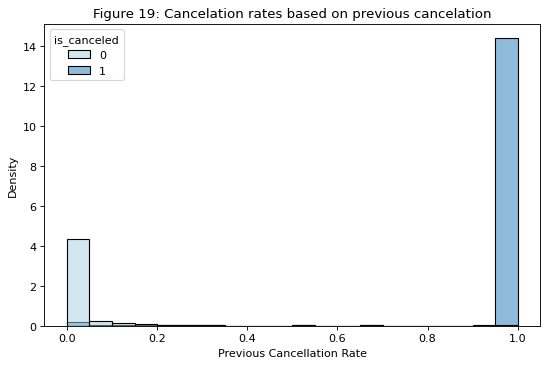

In [ ]:
previous_cancelation_ax = sns.histplot(
    hue='is_canceled', 
    x='previous_cancellation_rate', 
    stat='density',
    bins=20,
    data=train_set, 
    palette = sns.color_palette("Paired",2)

    )
previous_cancelation_ax.set(
    xlabel='Previous Cancellation Rate')
previous_cancelation_ax.set_title(
    'Figure 19: Cancelation rates based on previous cancelation'
    )
plt.show()

In [ ]:
booking = train_set.groupby('binary_booking_changes')['is_canceled'].value_counts(
    normalize = True).unstack('is_canceled').plot.bar(stacked = True, alpha = 0.9, color = sns.color_palette("Paired",2))
    #alpha indicates how opacity of the plot
booking.set_title('Figure 17: Cancelation rate based on children' )
booking.set(
    xlabel = '', 
    ylabel = 'Cancelation Rate'
)
plt.xticks(rotation = 360)
plt.show()

KeyError: 'binary_booking_changes'

## 3. Understanding reasons behind cancelations
In this section, we will summarise our findings of various reasons of cancelations. 

1. Couples\Parents more likely to cancel when having babies than not
2. Parking space seems significant
3. People from certain countries: (try finding patters which countries, some reasoning)
4. The more number of special requests the less likely person will cancel
5. People always cancel if there is a booking for 5+ adults. 
6. No refundable deposits - always get canceled. 

## One hot encoding

In [ ]:
#onehot_vars = ["deposit_type","market_segment", "hotel"]

# Create binary variables for potential features
#d_balanced = pd.get_dummies(
    #d_balanced,
    #columns = onehot_vars, 
    #drop_first = True
    #)

## 4. Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model. You are strongly encouraged to explore many different modeling methods (e.g. logistic regression, classification trees, SVC, etc.) but you should not include a detailed narrative of all of these attempts. At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validatin it.*

*This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.*

In [ ]:
#d_balanced['trip_type'] = np.where(d_balanced['company'].isnull(), 'Personal', 'Business')
#d_balanced['binary_previous_cancellation'] = np.where(d_balanced['previous_cancellations']>0, 1,0)
#d_balanced['binary_babes'] = np.where(d_balanced['babies'] >0, 1, 0 ) 
#d_balanced['binary_children'] = np.where(d_balanced['children']>0,1,0 )
#d_balanced['special_requests'] = np.where(d_balanced['total_of_special_requests']>0, 1, 0)
#d_balanced['binary_car_park'] = np.where(d_balanced['required_car_parking_spaces']>0,1,0)
#d_balanced['binary_booking_changes'] = np.where(d_balanced['booking_changes']>0,1,0 )

#Some other features that can be engineered - removed this later if not used

#d_balanced['stays_nights_total'] = d_balanced['stays_in_week_nights'] + d_balanced['stays_in_weekend_nights']
#d_balanced['previous_cancellation_rate'] = d_balanced['previous_cancellations'] / (d_balanced['previous_cancellations'] + d_balanced['previous_bookings_not_canceled'])


In [ ]:
## -- data split again (find a way to get around this, cause Colin the great)
features = d_balanced[["deposit_type", "country_name",
"adults","binary_car_park","binary_previous_cancellations","special_requests","adr", "market_segment"]]

X = pd.get_dummies( 
    features, 
    columns = ["deposit_type","market_segment", "country_name"], 
    drop_first = True
    )

y =d_balanced['is_canceled'] #response

# For Mariel: Test and train size need to be the same 

X_train, X_test = train_test_split(X, test_size=0.25, random_state = 123) #60 - 40 split 
y_train, y_test = train_test_split(y, test_size=0.25, random_state = 123) #50 - 50 split


In [ ]:
X_train.values.shape

(66336, 171)

In [ ]:
y_train.shape

(66336,)

In [ ]:
def fit_svc(kernel, C):
    m_svc = make_pipeline(
        sklearn.preprocessing.StandardScaler(),
        sklearn.svm.SVC(C=C, kernel=kernel)
    ).fit(X,y)
    
    model_test_assess(m_svc)

# Purpose of this function is yet to be explored.. 

Logistic: ROC AUC=0.872
No Skill: ROC AUC=0.500


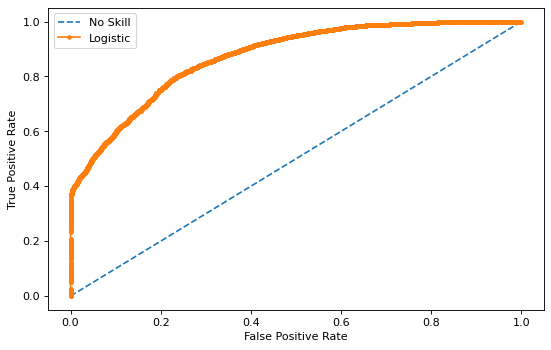

In [ ]:
m = make_pipeline(
    LogisticRegression(solver='lbfgs',max_iter=400)
 ).fit(X_train, y_train)

 # https://discuss.analyticsvidhya.com/t/what-is-the-difference-between-predict-and-predict-proba/67376


mpreds = m.predict_proba(X_test)
mpreds = mpreds[:,1]

ns_probs = [0 for _ in range(len(y_test))]

#scores
lr_auc = roc_auc_score(y_test, mpreds)
ns_auc = roc_auc_score(y_test, ns_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

#ROC curve for null and logistic
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, mpreds)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#no genius: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


So, we should prioritise on ROC as opposed to Precision Recall curve cause we have eliminated the antisemitism regarding the imbalanced classes and now all is smooth. 

 #https://medium.com/swlh/confusion-matrix-and-classification-report-88105288d48f

We can also see how important is Portugal besides other countries, since it's cancelation rates are higher than all of the other countries combined(or a greater proportion of cancelation rates) we can say that we can take portugal itself as a feature and exclude other countries. If we get a high AUC then we have done something good, I guess.  

In [ ]:
features = d_balanced[["deposit_type", "country_name",
"adults","binary_car_park","binary_previous_cancellations","special_requests","adr", "market_segment"]]

X = pd.get_dummies( 
    features, 
    columns = ["deposit_type","market_segment"], 
    drop_first = True
    )

y =d_balanced['is_canceled'] #response

X['portugal'] = np.where(X['country_name'] == 'Portugal', 1, 0)

X = X.drop("country_name", axis = 1)


X_train1, X_test1 = train_test_split(X, test_size=0.25, random_state = 123) #60 - 40 split 
y_train1, y_test1 = train_test_split(y, test_size=0.25, random_state = 123) #50 - 50 split




In [ ]:
X_train1.shape

(66336, 15)

In [ ]:
y_train1.shape

(66336,)

Logistic: ROC AUC=0.867
No Skill: ROC AUC=0.500


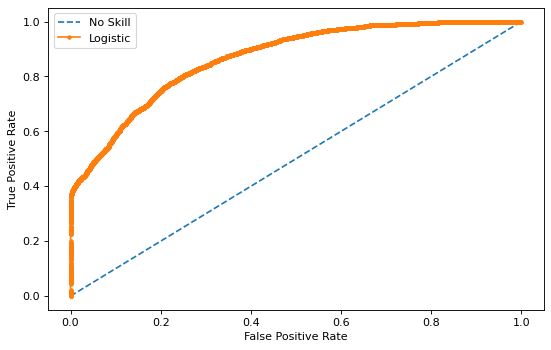

In [ ]:
m = make_pipeline(
    LogisticRegression(solver='lbfgs',max_iter=400)
 ).fit(X_train1, y_train1)

 # https://discuss.analyticsvidhya.com/t/what-is-the-difference-between-predict-and-predict-proba/67376


mpreds = m.predict_proba(X_test1)
mpreds = mpreds[:,1]

ns_probs = [0 for _ in range(len(y_test1))]

#scores
lr_auc = roc_auc_score(y_test, mpreds)
ns_auc = roc_auc_score(y_test, ns_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

#ROC curve for null and logistic
ns_fpr, ns_tpr, _ = roc_curve(y_test1, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test1, mpreds)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()



Portugal is important AUC originally 0.875 , AUC new: 0.871 this means Portugal is most important. 

In [ ]:
features = d_balanced[["deposit_type", "country_name",
"adults","binary_car_park","binary_previous_cancellations","special_requests","adr"]]


X = pd.get_dummies( 
    features, 
    columns = ["deposit_type"], 
    drop_first = True
    )

y =d_balanced['is_canceled'] #response

X['Portugal'] = np.where(X['country_name'] == 'Portugal', 1, 0)

X = X.drop("country_name", axis = 1)


X_train2, X_test2 = train_test_split(X, test_size=0.25, random_state = 123) #60 - 40 split 
y_train2, y_test2 = train_test_split(y, test_size=0.25, random_state = 123) #50 - 50 split


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

Logistic: ROC AUC=0.819
No Skill: ROC AUC=0.500


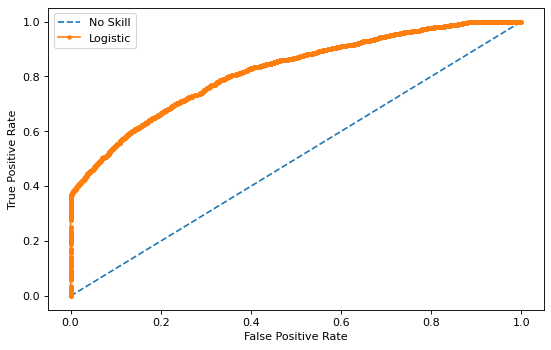

In [ ]:
m = make_pipeline(
    LogisticRegression(solver='lbfgs',max_iter=400)
 ).fit(X_train2, y_train2)

 # https://discuss.analyticsvidhya.com/t/what-is-the-difference-between-predict-and-predict-proba/67376


mpreds = m.predict_proba(X_test2)
mpreds = mpreds[:,1]

ns_probs = [0 for _ in range(len(y_test2))]

#scores
lr_auc = roc_auc_score(y_test2, mpreds)
ns_auc = roc_auc_score(y_test2, ns_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

#ROC curve for null and logistic
ns_fpr, ns_tpr, _ = roc_curve(y_test2, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test2, mpreds)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

We can do a feature importance through something called as permutation importance. Permutation feature importance is a model inspection technique that can be used for any fitted estimator when the data is tabular. This is especially useful for non-linear or opaque estimators.

The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled 1. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature.

https://scikit-learn.org/stable/modules/permutation_importance.html#:~:text=The%20permutation%20feature%20importance%20is,model%20depends%20on%20the%20feature.

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
Decision_tree  = DecisionTreeClassifier(
    criterion = 'gini',
    random_state = 29, 
    max_depth = 6
    ).fit(X_train1,  y_train1)

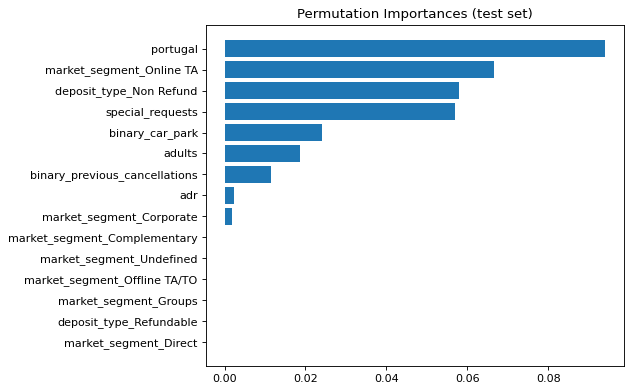

In [ ]:
# We explore on the test set, no idea if it is right or not. 
perm_test = permutation_importance(Decision_tree, X_test1, y_test1, n_repeats=30,
                          random_state=0)


sorted_index = perm_test.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(X_test1.columns[sorted_index], perm_test.importances[sorted_index].mean(axis=1).T)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

#Idea copied from: https://stackoverflow.com/questions/62531881/why-does-the-permutation-importance-box-plot-look-strange-how-to-plot-a-horizon



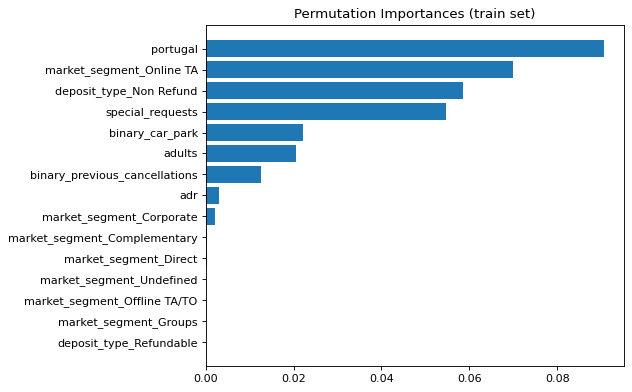

In [ ]:
perm_test = permutation_importance(Decision_tree, X_train1, y_train1, n_repeats=30,
                          random_state=0)


sorted_index = perm_test.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(X_train1.columns[sorted_index], perm_test.importances[sorted_index].mean(axis=1).T)
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()


In [ ]:
#You can python, no I cant
grids = GridSearchCV(
    make_pipeline( 
    LogisticRegression(solver='lbfgs',max_iter=100)
    ),
    param_grid={"logisticregression__C":np.logspace(-3,3,7),"logisticregression__penalty":["l2", "none"]},
    cv=KFold(5, shuffle=True, random_state=1234),
    scoring="recall"
    ).fit(X_train, y_train)

In [ ]:
#Model performance metric
#from sklearn.metrics import classification_report
#predicts =grids.predict(X_test)
#print("Logistic regression model:")
#print(classification_report(y_test, predicts))

In [ ]:
def hyper_search(model, params, X, y,  n_iter=150, metric="recall", 
                 cv = KFold(10), random_state=29, refit=True,
                 overwrite=False, warning=False):
  
    if all(type(x)==list for x in params.values()):
        search_type = "Gridsearch"
        models = GridSearchCV(model, param_grid=params, scoring=metric, cv=cv, 
                                  refit=refit, return_train_score=True)
        n_iter = len(list(itertools.product(*list(iter(params.values())))))
    
    else:
        search_type = "Randomsearch"
        models = RandomizedSearchCV(model, param_distributions=params,
                                        n_iter=n_iter, scoring=metric, cv=cv,
                                        refit=refit, random_state=random_state,
                                        return_train_score=True)
      

    start = time()
    if warning:
        models.fit(X, y)
    else:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            models.fit(X, y)  

    return models

In [ ]:
#param_grid = {"max_depth":list(range(4,12)), "criterion": ["gini", "entropy"] }
#DT_g = DecisionTreeClassifier(random_state = 29)
#depth_gs = hyper_search(DT_g, param_grid, X_train.values, y_train)

#pd.DataFrame(depth_gs.cv_results_).sort_values(
       # "rank_test_score")[["param_max_depth",
        #   "param_criterion", 
        #   "mean_test_score", 
        #   "std_test_score"]].head()
#Ohhhh results woahhhhhh 

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(Decision_tree, X_test, y_test,
                                 display_labels=["not_canceled", "canceled"],
                                 include_values = True,
                                 cmap = plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

ValueError: X has 172 features, but DecisionTreeClassifier is expecting 16 features as input.

In [ ]:
from sklearn.svm import SVC
from sklearn import svm, datasets

In [ ]:
#sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)

In [ ]:
classes = X_test.unique()
n_classes = len(X_test).unique())

SyntaxError: invalid syntax (<ipython-input-61-26885a33e993>, line 2)

In [ ]:
def ovr_roc_plot(y_true, y_pred):
    """ 
    
    Draw ROC curves using one-vs-rest approach

    """
    
    classes = y_true.unique()
    n_classes = len(y_true.unique())
    
    # Convert from n x 1 categorical matrix to n x k binary matrix
   # y_true = pd.get_dummies(y_true).to_numpy()
    
    #y_pred = y_pred.to_numpy()
    
    # Sanity Check
    if y_true.shape[1] != y_pred.shape[1]:
        raise ValueError("Truth and prediction dimensions do not match.")
    
    # Compute ROC curve and ROC area for each class
    rocs = dict() 
    aucs = dict() 
    for name, i in zip(classes, range(n_classes)):
        aucs[i] = pd.DataFrame({ 
            'precinct': [name],
            'auc': [sklearn.metrics.roc_auc_score(y_true[:, i], y_pred[:, i])]
        })
        
        rocs[i] = pd.DataFrame(
            data = np.c_[sklearn.metrics.roc_curve(y_true[:, i], y_pred[:, i])],
            columns = ('fpr', 'tpr', 'threshold')
        ).assign(
            is_canceled = name
        )

    # Bind rows to create a single data frame for each
    roc = pd.concat(rocs, ignore_index=True)
    auc = pd.concat(aucs, ignore_index=True)
    
    # Create plot
    fig = plt.figure(figsize=(8, 8))
    sns.lineplot(x='fpr', y='tpr', hue='is_canceled', data=roc, ci=None)

    plt.plot([0,1],[0,1], 'k--', alpha=0.5) # 0-1 line 
    plt.title("ROC (one-vs-rest) curves")
         
    L = plt.legend()
    for precinct, auc_val, i in zip(auc.precinct, auc.auc, range(n_classes)):
        L.get_texts()[i].set_text("{} (auc {:.3f})".format(precinct, auc_val))
        
    plt.show()
    
    # Return the AUCs as a Data Frame
    return(auc)

In [ ]:
y_train.shape

(66336,)

In [ ]:
y_test.shape

(22112,)

In [ ]:
ovr_roc_plot(X_test, y_test)



AttributeError: 'DataFrame' object has no attribute 'unique'

## 5. Discussion & Conclusions


*In this section you should provide a general overview of your final model, its performance, and reliability. You should discuss what the implications of your model are in terms of the included features, predictive performance, and anything else you think is relevant.*

*This should be written with a target audience of the client who is with the hotel data and university level mathematics but not necessarily someone who has taken a postgraduate statistical modeling course. Your goal should be to convince this audience that your model is both accurate and useful.*

*Keep in mind that a negative result, i.e. a model that does not work well predictively, that is well explained and justified in terms of why it failed will likely receive higher marks than a model with strong predictive performance but with poor or incorrect explinations / justifications.*

## References and Hints: 
1)Hotel booking demand datasets:  https://www.sciencedirect.com/science/article/pii/S2352340918315191?via%3Dihub <br>
2)Sorting a pandas data frame by month:  https://stackoverflow.com/questions/48042915/sort-a-pandass-dataframe-series-by-month-name <br>
3) 

## Convert Document

In [ ]:
# Run the following to render to PDF
!jupyter nbconvert --to pdf proj2.ipynb

[NbConvertApp] Converting notebook proj2.ipynb to pdf
[NbConvertApp] Support files will be in proj2_files/
[NbConvertApp] Making directory ./proj2_files
[NbConvertApp] Making directory ./proj2_files
[NbConvertApp] Making directory ./proj2_files
[NbConvertApp] Making directory ./proj2_files
[NbConvertApp] Making directory ./proj2_files
[NbConvertApp] Making directory ./proj2_files
[NbConvertApp] Making directory ./proj2_files
[NbConvertApp] Making directory ./proj2_files
[NbConvertApp] Making directory ./proj2_files
[NbConvertApp] Making directory ./proj2_files
[NbConvertApp] Making directory ./proj2_files
[NbConvertApp] Making directory ./proj2_files
[NbConvertApp] Making directory ./proj2_files
[NbConvertApp] Making directory ./proj2_files
[NbConvertApp] Making directory ./proj2_files
[NbConvertApp] Making directory ./proj2_files
[NbConvertApp] Making directory ./proj2_files
[NbConvertApp] Making directory ./proj2_files
[NbConvertApp] Making directory ./proj2_files
[NbConvertApp] Writ

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0ddbf15f-378d-49eb-bd9e-126b66866c79' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>